# Avocado Project

In [1]:
# Importing the required library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
import pickle
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore

In [2]:
#reading the project.
avocado_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [3]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the last columns of the dataframe. 
avocado_df.tail(100)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# to check the size of the dataframe  
avocado_df.shape

(16468, 14)

In [6]:
# Checking the type of the dataframe. 
avocado_df['type'].unique()

array(['conventional', nan], dtype=object)

In [7]:
# printing the number of rows and the columns.
print('Number of columns - ',avocado_df.shape[1])
print('Number of rows - ',avocado_df.shape[0])

Number of columns -  14
Number of rows -  16468


In [8]:
# to seperate the columns from the dataframe.
avocado_df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [9]:
#To check the count of the null values in the dataframe.
avocado_df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

<AxesSubplot:>

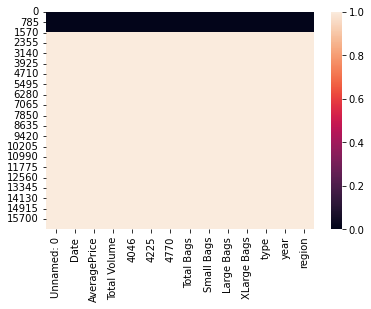

In [10]:
# to project null values in the graphical representation. 
sns.heatmap(avocado_df.isnull())

In [11]:
# To check the percentage of the missing data. 
missing_percentage = (avocado_df.isnull().sum() / len(avocado_df)) * 100
print(missing_percentage)

Unnamed: 0      90.788195
Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64


In [12]:
# To drop the missing values from the data. 
avocado_df = avocado_df.dropna()

In [13]:
# Check the size of the new dataframe. 
avocado_df.shape

(1517, 14)

In [14]:
# to check the last columns of datasframe. 
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [16]:
# Changing the format of the dataframe. 
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'], format='%d-%m-%Y')

In [17]:
avocado_df['Month'] = avocado_df['Date'].dt.month
avocado_df['Day'] = avocado_df['Date'].dt.day

In [101]:
# as the problrm statement suggest that there are two categories of avocado to check the same. 
avocado_df['type'].unique()

array(['conventional'], dtype=object)

In [18]:
# Dropping the columns 
avocado_df.drop(["Unnamed: 0","Date"],axis=1, inplace=True)

In [19]:
# describing the data. 
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777,15.449572
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.391243,8.796714
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


<AxesSubplot:>

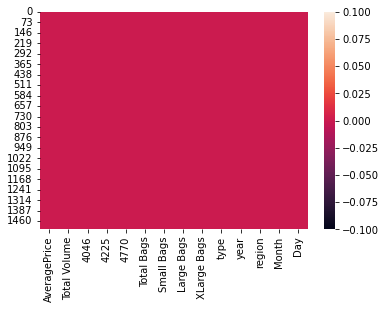

In [20]:
#To check the null values in the dataframe. 
sns.heatmap(avocado_df.isnull())

In [21]:
#There are blank spaces observed in the above graph. 

In [22]:
for col in avocado_df.columns:
    print(f"Column: {col}")
    print(avocado_df[col].value_counts())
    print("\n")

Column: AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64


Column: Total Volume
64236.62      1
332918.70     1
4565207.85    1
4831664.77    1
309024.22     1
             ..
141875.20     1
92599.79      1
98097.37      1
162559.72     1
182978.30     1
Name: Total Volume, Length: 1517, dtype: int64


Column: 4046
1036.74       1
193228.98     1
2166801.03    1
2295315.43    1
180977.06     1
             ..
93556.40      1
57713.02      1
61125.82      1
110439.42     1
43116.41      1
Name: 4046, Length: 1517, dtype: int64


Column: 4225
54454.85      1
45809.76      1
1226508.86    1
1290847.05    1
46253.49      1
             ..
12101.67      1
9666.15       1
8956.16       1
11892.01      1
54193.42      1
Name: 4225, Length: 1517, dtype: int64


Column: 4770
57.68        2
48.16        1
271514.98    1
392846.12    1
12923.45     1
            ..
8

In [23]:
# to check the no. of unique values present in the data. 
avocado_df.nunique().to_frame("No. of unique value")

,No. of unique value
AveragePrice,113
Total Volume,1517
4046,1517
4225,1517
4770,1516
Total Bags,1517
Small Bags,1517
Large Bags,1377
XLarge Bags,711
type,1


2015.0    1270
2016.0     247
Name: year, dtype: int64


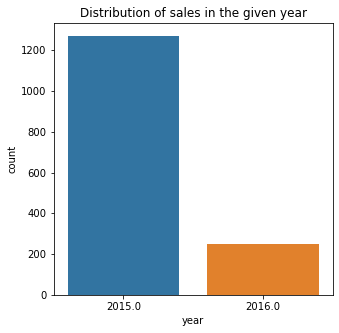

In [24]:
plt.figure(figsize=(5, 5))
sns.countplot(x='year', data=avocado_df)
plt.title('Distribution of sales in the given year')
print(avocado_df['year'].value_counts())
plt.show()

In [25]:
#The sales are observed the most in the year 2015. 

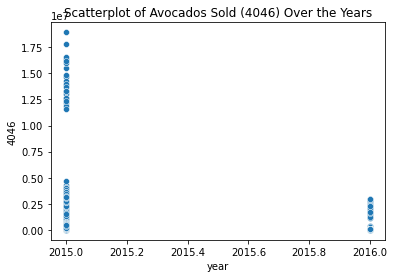

In [26]:
#Scatterplot of Avocados Sold (4046) Over the Years
sns.scatterplot(x='year', y='4046', data=avocado_df)
plt.title('Scatterplot of Avocados Sold (4046) Over the Years')
plt.show()

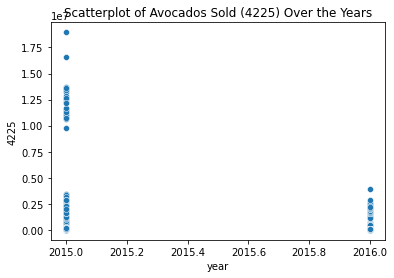

In [27]:
#Scatterplot of Avocados Sold (4225) Over the Years
sns.scatterplot(x='year', y='4225', data=avocado_df)
plt.title('Scatterplot of Avocados Sold (4225) Over the Years')
plt.show()

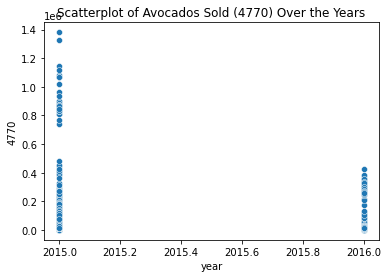

In [28]:
#Scatterplot of Avocados Sold (4770) Over the Years
sns.scatterplot(x='year', y='4770', data=avocado_df)
plt.title('Scatterplot of Avocados Sold (4770) Over the Years')
plt.show()

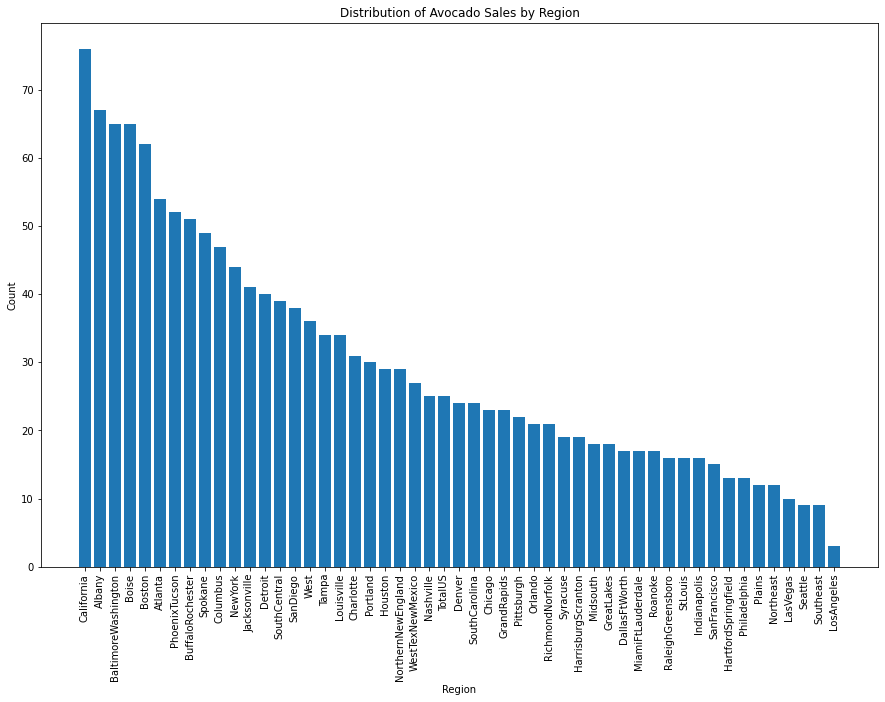

In [29]:
# Count the number of occurrences of each region
region_counts = avocado_df['region'].value_counts()

plt.figure(figsize=(15, 10))
plt.bar(region_counts.index, region_counts)
plt.title('Distribution of Avocado Sales by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

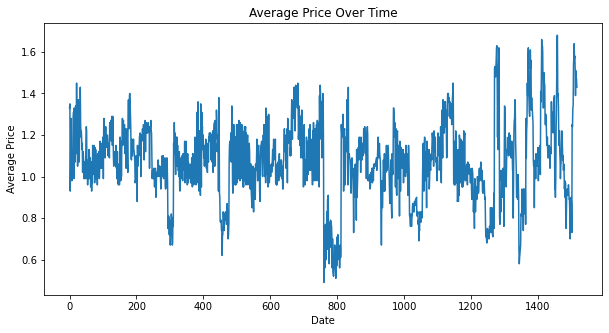

In [30]:
# Plotting AveragePrice over time
plt.figure(figsize=(10,5))
plt.plot(avocado_df['AveragePrice'])
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

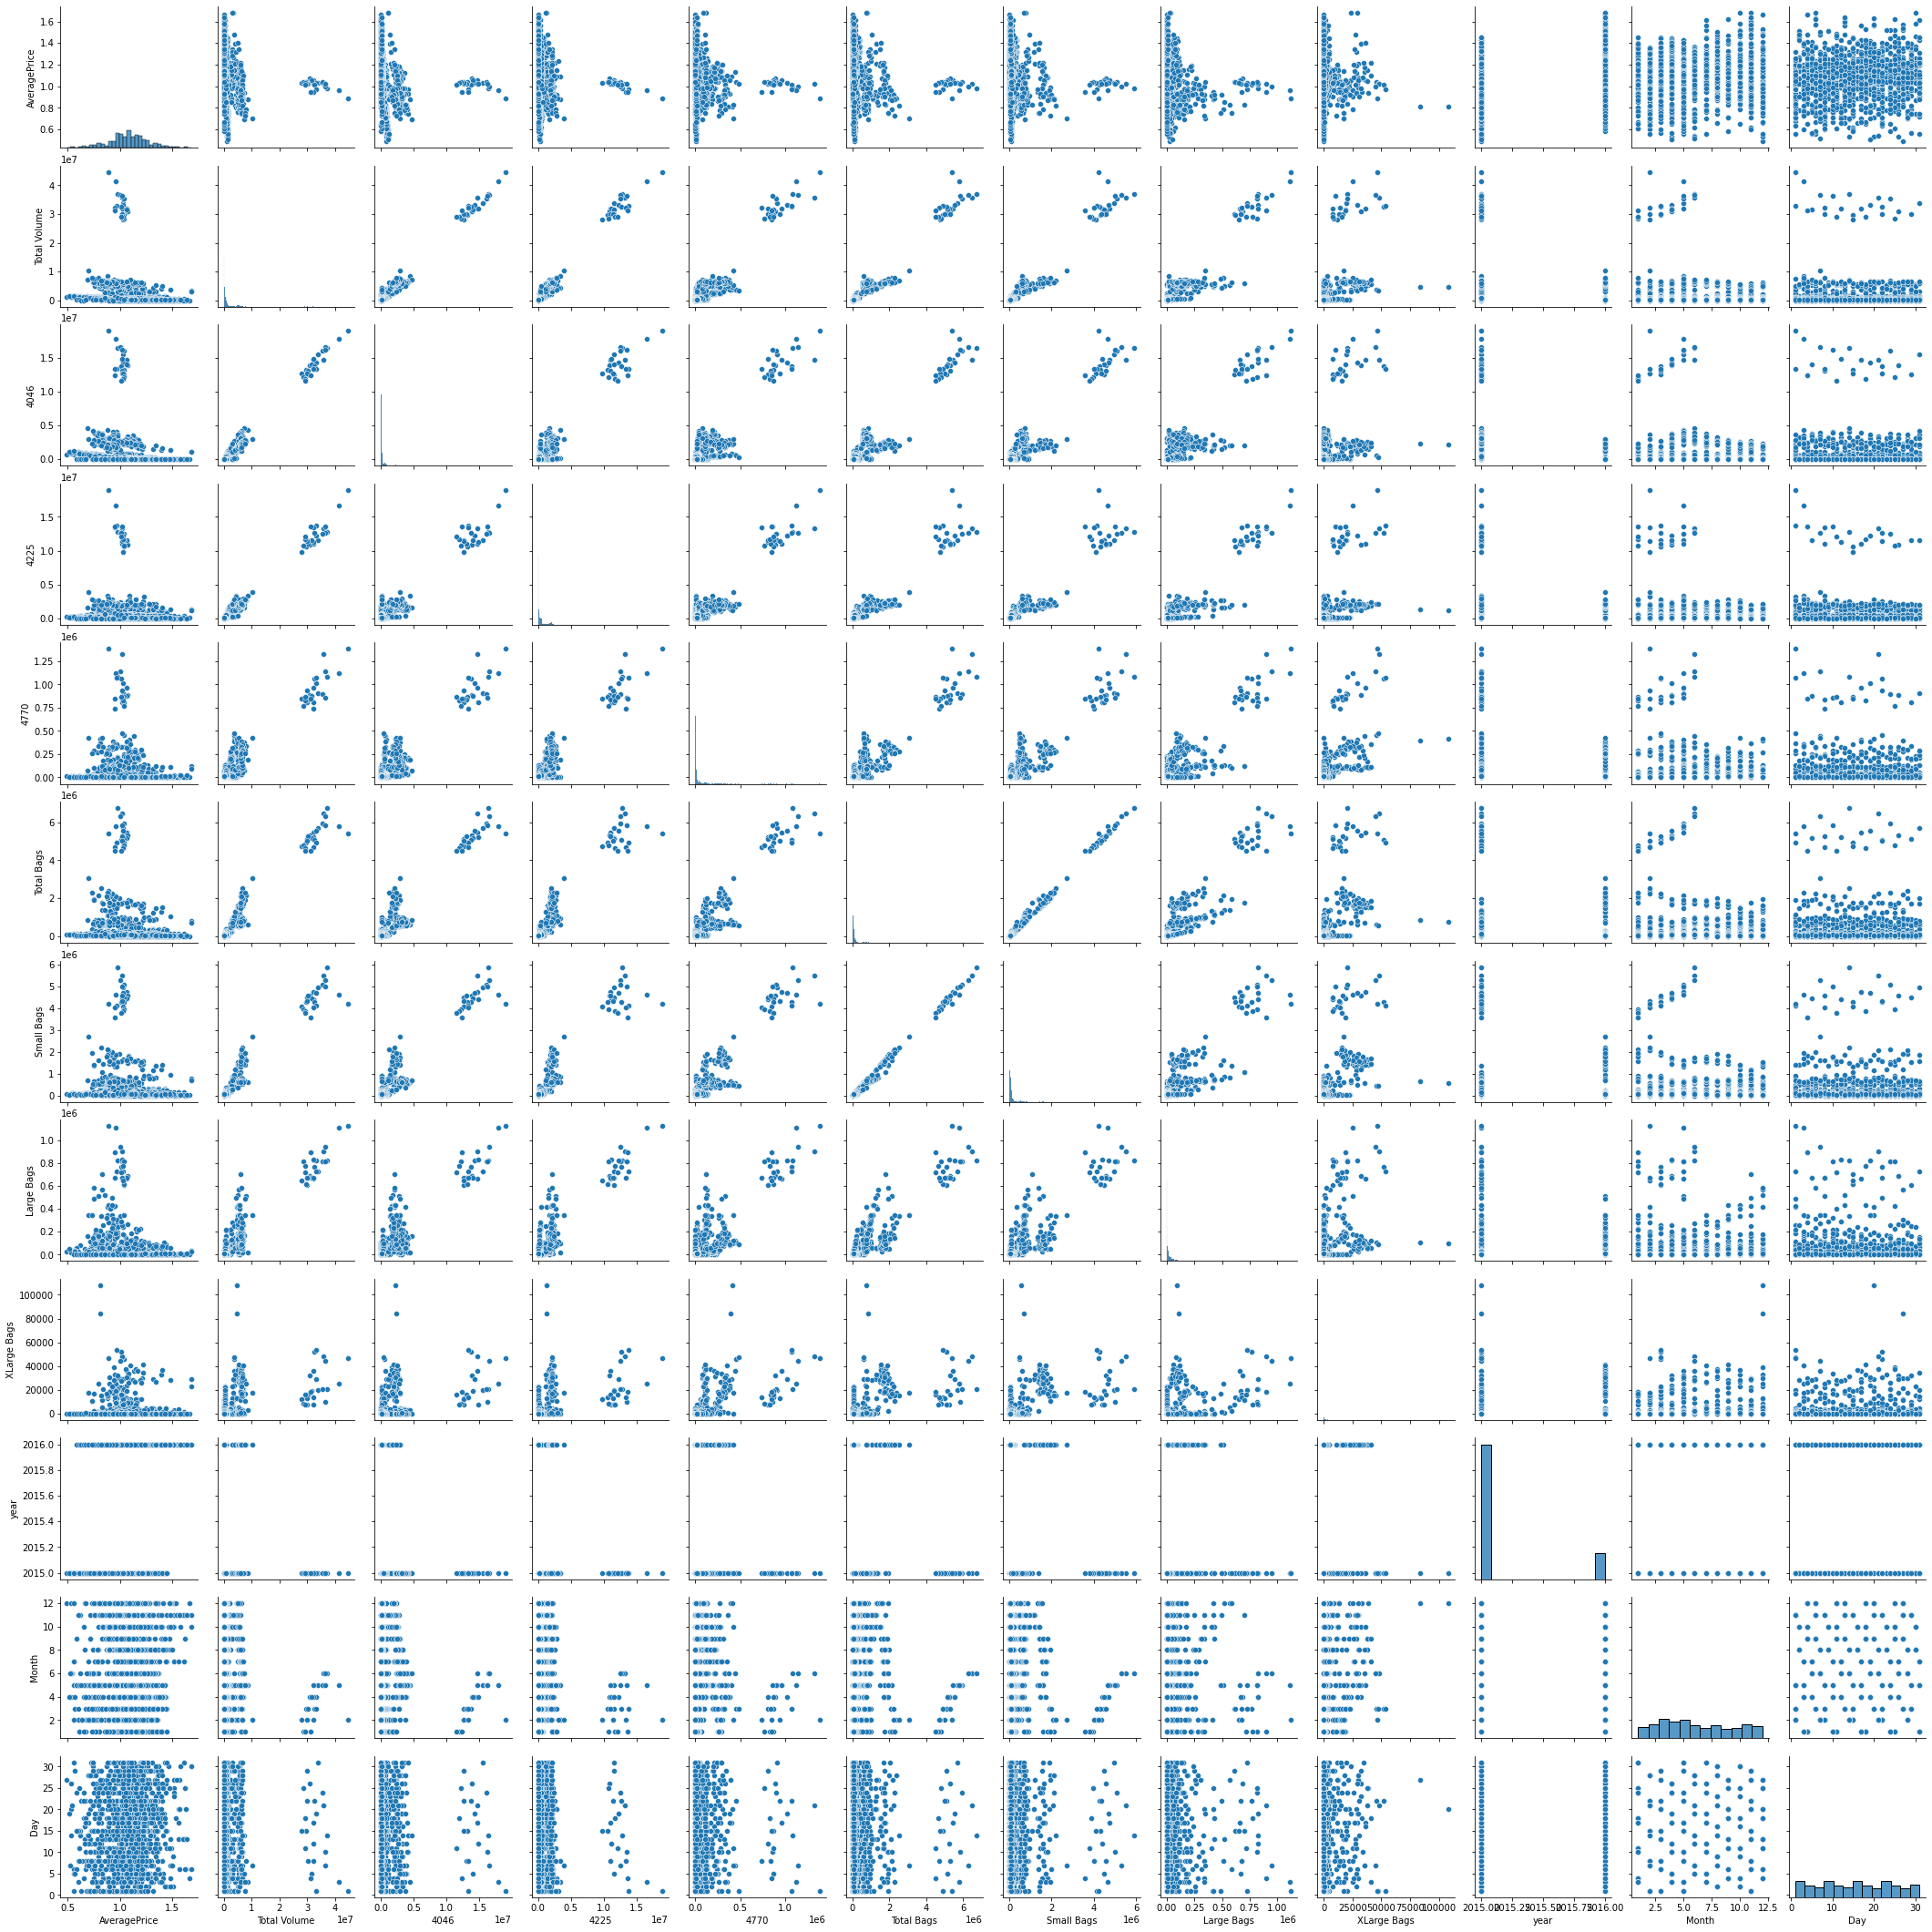

In [115]:
sns.pairplot(data=avocado_df,palette='park')

In [31]:
# checking the datatype of the columns.
avocado_df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
Month             int64
Day               int64
dtype: object

In [32]:
#Using the fit_transform method that fits the label encoder to the data and then transforms the data to encoded labels.
le = LabelEncoder()
avocado_df['type'] = le.fit_transform(avocado_df['type'])
avocado_df['region'] = le.fit_transform(avocado_df['region'])

In [33]:
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440,6.166777,15.449572
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398,3.391243,8.796714
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000,3.000000,8.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000,12.000000,31.000000


In [34]:
#The count of all the columns are the same. hence it is ascertained that there are no missing values in the dataframe. 
# Left skewed median is more than the mean : Total Volume, 4046, 4770, Total bags and average price 
# Right skewed mean is more than the median : 4225 
#We can ifdentify that the min, 25%,50% has zero observation. Hence we will have to deal with the issue

In [35]:
avocado_df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7,10,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7,10,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7,9,25
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,0,2016.0,7,9,18


In [36]:
corr= avocado_df.corr()

In [37]:
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408,0.066859,0.092531
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579,-0.090520,-0.022423
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481,-0.090647,-0.018394
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733,-0.091329,-0.032709
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092,-0.074855,-0.014611
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001,-0.081330,-0.009035
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650,-0.084376,-0.003583
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452,-0.062447,-0.038890
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144,0.049232,0.009174
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


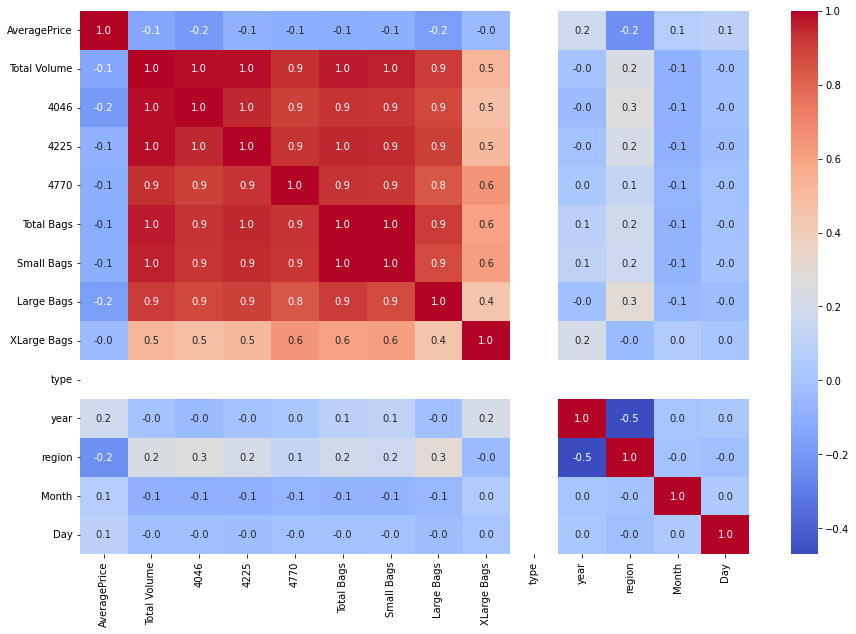

In [38]:
#Correlation Matrix 
plt.figure(figsize=(15,10))
sns.heatmap(avocado_df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.show()

# Inspiration /Label : Region


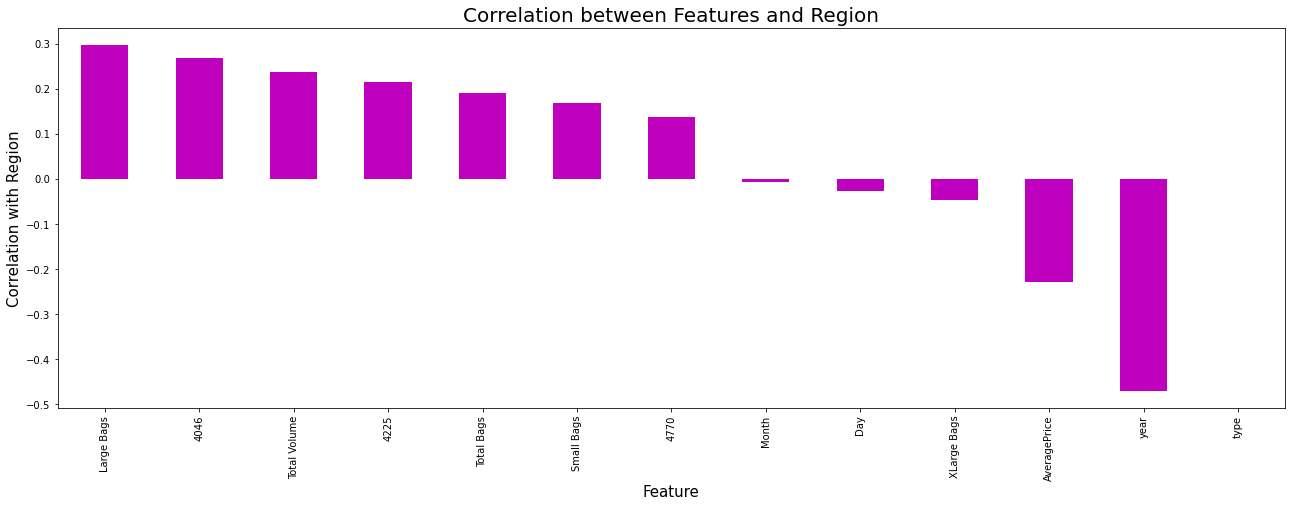

In [39]:
plt.figure(figsize=(22, 7))
avocado_df.corr()['region'].sort_values(ascending=False).drop('region').plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Correlation with Region', fontsize=15)
plt.title('Correlation between Features and Region', fontsize=20)
plt.show()

In [40]:
# Dropping less relevant columns
avocado_df = avocado_df.drop(['type', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'Month', 'Day'], axis=1)

In [41]:
avocado_df.head()

,AveragePrice,Total Volume,Total Bags,XLarge Bags,year,region
0,1.33,64236.62,8696.87,0.0,2015.0,0
1,1.35,54876.98,9505.56,0.0,2015.0,0
2,0.93,118220.22,8145.35,0.0,2015.0,0
3,1.08,78992.15,5811.16,0.0,2015.0,0
4,1.28,51039.60,6183.95,0.0,2015.0,0


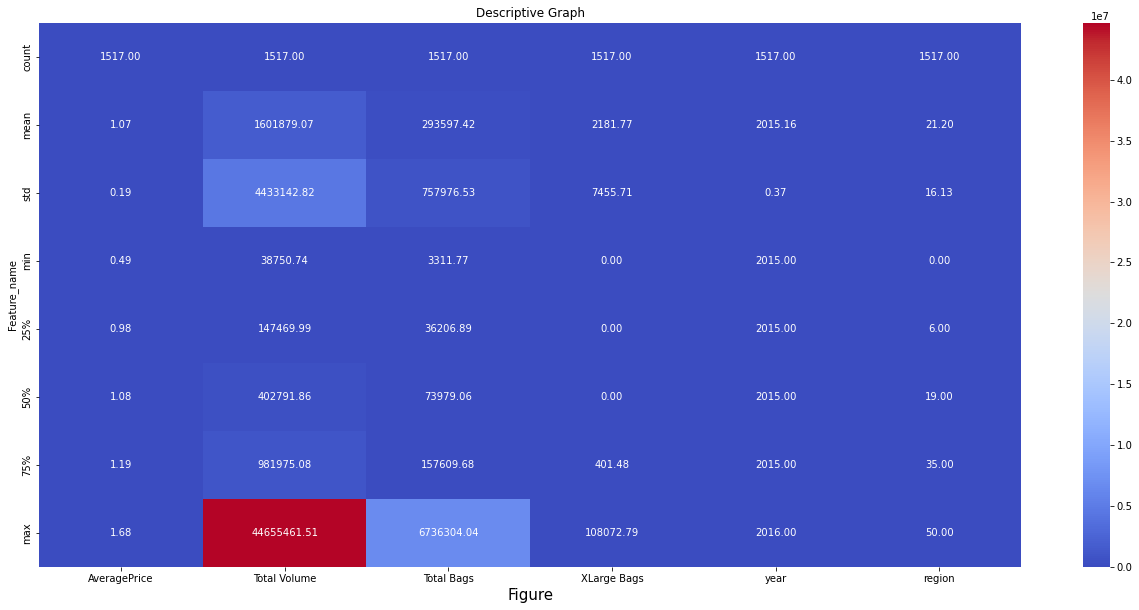

In [42]:
plt.figure(figsize=(22,10))
sns.heatmap(avocado_df.describe(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.2f")
plt.xlabel('Figure', fontsize=15)
plt.ylabel('Feature_name')
plt.title('Descriptive Graph')
plt.show()

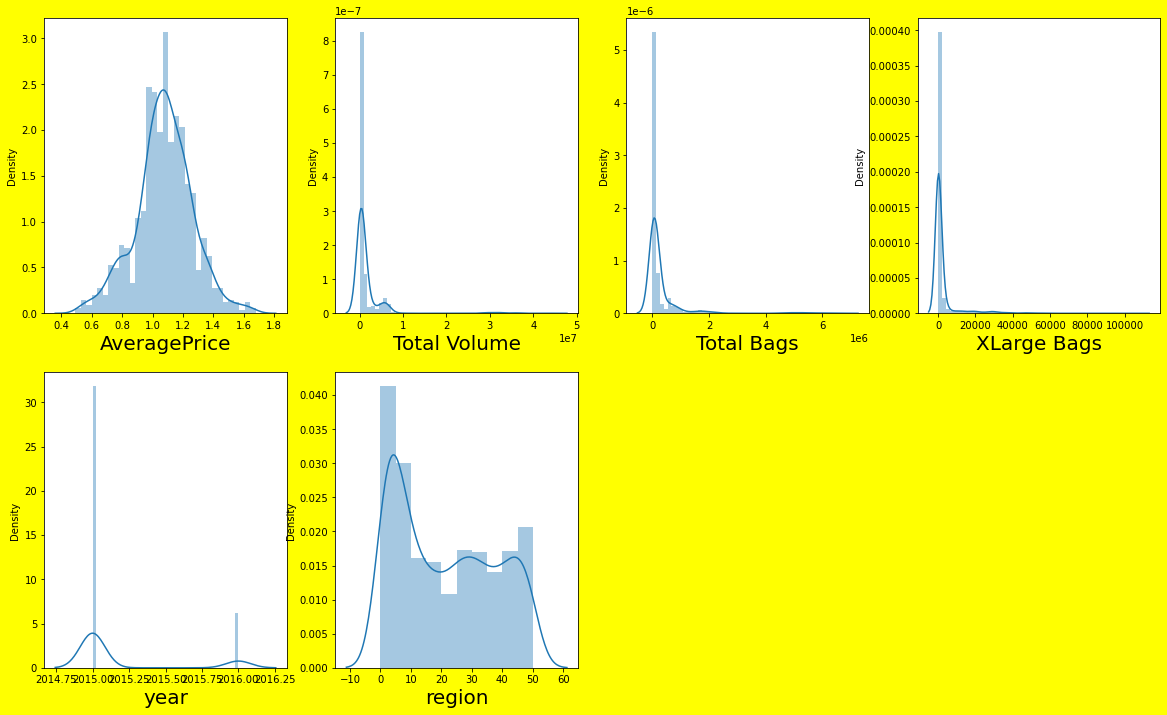

In [43]:
#To check the distribution of the data in every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for columns in avocado_df:
    if plotnumber<=13:             # since there are 11 columns in the data set
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(avocado_df[columns])
        plt.xlabel(columns,fontsize=20)
    
    plotnumber+=1
plt.show()

In [44]:
avocado_df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
Total Bags      5.366378
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [45]:
#region: The data is fairly distributed. 

In [46]:
#divinding the data into the labels and the features. 
X = avocado_df.drop(columns=['region'])
Y = avocado_df['region']

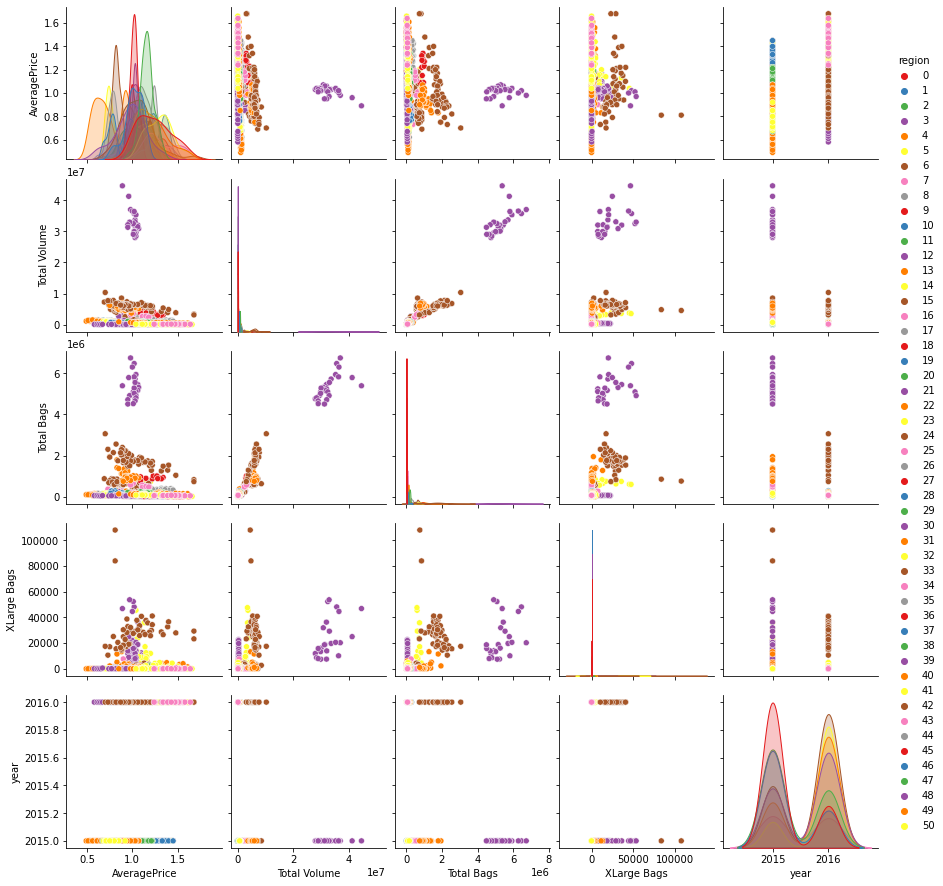

In [132]:
sns.pairplot(avocado_df,hue="region",palette="Set1")

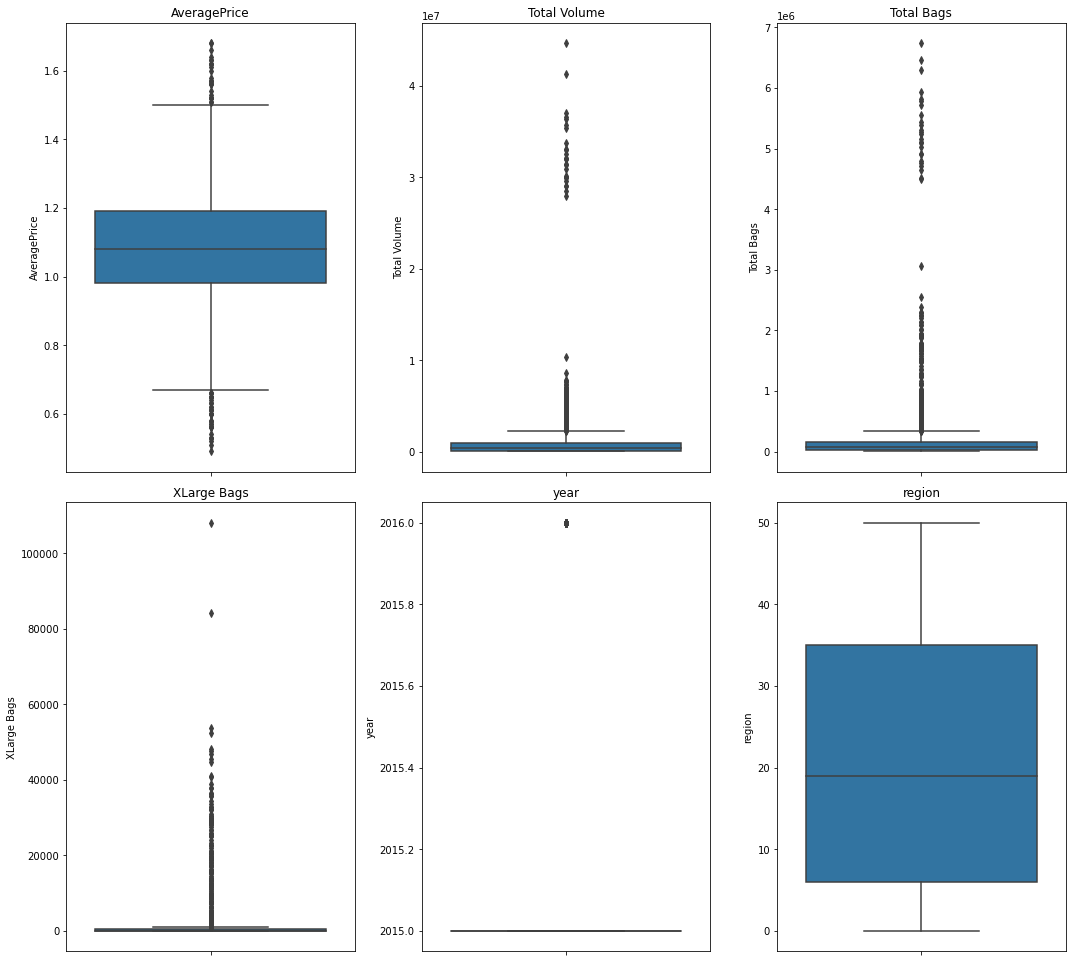

In [133]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in avocado_df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(data=avocado_df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()


In [134]:
import numpy as np
from scipy.stats import zscore

# Checking the outliers using zscore
features = avocado_df.drop('region', axis=1)
z = np.abs(zscore(features))

# Defining a threshold limit
threshold = 3

# Removing outliers
df = avocado_df[(z < threshold).all(axis=1)]

# Print shapes to check data loss
print("Old dataframe shape:", avocado_df.shape)
print("New dataframe shape:", df.shape)

# Calculate data loss
data_loss = ((avocado_df.shape[0] - df.shape[0]) / df.shape[0]) * 100
print("Data Loss Percentage =", data_loss)

# Define your X and y here after removing outliers
X = df.drop('region', axis=1)
Y = df['region']

Old dataframe shape: (1517, 6)
New dataframe shape: (1450, 6)
Data Loss Percentage = 4.620689655172414


In [135]:
df.shape

(1450, 6)

In [136]:
#To check if the feature matrix are stored in the X & the response (target) in vector y. 
X

,AveragePrice,Total Volume,Total Bags,XLarge Bags,year
0,1.33,64236.62,8696.87,0.00,2015.0
1,1.35,54876.98,9505.56,0.00,2015.0
2,0.93,118220.22,8145.35,0.00,2015.0
3,1.08,78992.15,5811.16,0.00,2015.0
4,1.28,51039.60,6183.95,0.00,2015.0
...,...,...,...,...,...
1512,1.39,190846.01,59418.46,240.28,2016.0
1513,1.51,178235.75,63300.70,0.00,2016.0
1514,1.48,178410.82,62415.77,825.00,2016.0
1515,1.47,189131.52,63931.73,0.00,2016.0


In [137]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1450, dtype: int32

In [138]:
df.shape

(1450, 6)

In [139]:
print('Shape of X:', X.shape)
print('Shape of y:', Y.shape)

Shape of X: (1450, 5)
Shape of y: (1450,)


In [140]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [142]:
LR  = LogisticRegression()
LR.fit(X_train, y_train)
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [143]:
# Fit the models on the scaled training data
LR.fit(X_train_scaled, y_train)
DTC.fit(X_train_scaled, y_train)
RFC.fit(X_train_scaled, y_train)
KNC.fit(X_train_scaled, y_train)

# Make predictions on the test data
LR_predictions = LR.predict(X_test_scaled)
DTC_predictions = DTC.predict(X_test_scaled)
RFC_predictions = RFC.predict(X_test_scaled)
KNC_predictions = KNC.predict(X_test_scaled)

In [144]:
# Evaluate the models
LR_accuracy = accuracy_score(y_test, LR_predictions)
DTC_accuracy = accuracy_score(y_test, DTC_predictions)
RFC_accuracy = accuracy_score(y_test, RFC_predictions)
KNC_accuracy = accuracy_score(y_test, KNC_predictions)

In [145]:
LR_precision = precision_score(y_test, LR_predictions, average='weighted')
DTC_precision = precision_score(y_test, DTC_predictions, average='weighted')
RFC_precision = precision_score(y_test, RFC_predictions, average='weighted')
KNC_precision = precision_score(y_test, KNC_predictions, average='weighted')

In [146]:
LR_recall = recall_score(y_test, LR_predictions, average='weighted')
DTC_recall = recall_score(y_test, DTC_predictions, average='weighted')
RFC_recall = recall_score(y_test, RFC_predictions, average='weighted')
KNC_recall = recall_score(y_test, KNC_predictions, average='weighted')

In [147]:
LR_f1_score = f1_score(y_test, LR_predictions, average='weighted')
DTC_f1_score = f1_score(y_test, DTC_predictions, average='weighted')
RFC_f1_score = f1_score(y_test, RFC_predictions, average='weighted')
KNC_f1_score = f1_score(y_test, KNC_predictions, average='weighted')

In [148]:
# Create a table to compare the scores
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [LR_accuracy, DTC_accuracy, RFC_accuracy, KNC_accuracy],
    'Precision': [LR_precision, DTC_precision, RFC_precision, KNC_precision],
    'Recall': [LR_recall, DTC_recall, RFC_recall, KNC_recall],
    'F1 Score': [LR_f1_score, DTC_f1_score, RFC_f1_score, KNC_f1_score]
}

scores_df = pd.DataFrame(data)
print(scores_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.375862   0.318941  0.375862  0.313138
1        Decision Tree  0.706897   0.725870  0.706897  0.700957
2        Random Forest  0.786207   0.791904  0.786207  0.778029
3  K-Nearest Neighbors  0.593103   0.585577  0.593103  0.562292


In [152]:
metrics_df = pd.DataFrame(data)
print(metrics_df)

# Select the best model based on the desired metric (e.g., highest accuracy or F1-score)
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']

print("The best model is:", best_model)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.375862   0.318941  0.375862  0.313138
1        Decision Tree  0.706897   0.725870  0.706897  0.700957
2        Random Forest  0.786207   0.791904  0.786207  0.778029
3  K-Nearest Neighbors  0.593103   0.585577  0.593103  0.562292
The best model is: Random Forest


In [ ]:
# Define the hyperparameters to tune
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Save the best model for production
joblib.dump(best_model, 'best_model.pkl')

# Regression Model : Find the average price 

In [155]:
avocado_df.head()

,AveragePrice,Total Volume,Total Bags,XLarge Bags,year,region
0,1.33,64236.62,8696.87,0.0,2015.0,0
1,1.35,54876.98,9505.56,0.0,2015.0,0
2,0.93,118220.22,8145.35,0.0,2015.0,0
3,1.08,78992.15,5811.16,0.0,2015.0,0
4,1.28,51039.60,6183.95,0.0,2015.0,0


In [156]:
#splitting the Feature and the target &We will take target as the AveragePrice
X = avocado_df.drop(columns='AveragePrice',axis=1)
Y = avocado_df['AveragePrice']


In [157]:
X

,Total Volume,Total Bags,XLarge Bags,year,region
0,64236.62,8696.87,0.00,2015.0,0
1,54876.98,9505.56,0.00,2015.0,0
2,118220.22,8145.35,0.00,2015.0,0
3,78992.15,5811.16,0.00,2015.0,0
4,51039.60,6183.95,0.00,2015.0,0
...,...,...,...,...,...
1512,190846.01,59418.46,240.28,2016.0,7
1513,178235.75,63300.70,0.00,2016.0,7
1514,178410.82,62415.77,825.00,2016.0,7
1515,189131.52,63931.73,0.00,2016.0,7


In [158]:
Y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [159]:
# Features scaling using 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_scaled

,Total Volume,Total Bags,XLarge Bags,year,region
0,-0.346966,-0.375994,-0.292727,-0.441008,-1.314338
1,-0.349078,-0.374927,-0.292727,-0.441008,-1.314338
2,-0.334785,-0.376722,-0.292727,-0.441008,-1.314338
3,-0.343636,-0.379802,-0.292727,-0.441008,-1.314338
4,-0.349944,-0.379310,-0.292727,-0.441008,-1.314338
...,...,...,...,...,...
1512,-0.318397,-0.309055,-0.260489,2.267532,-0.880286
1513,-0.321242,-0.303931,-0.292727,2.267532,-0.880286
1514,-0.321203,-0.305099,-0.182037,2.267532,-0.880286
1515,-0.318784,-0.303098,-0.292727,2.267532,-0.880286


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
X_train  

,Total Volume,Total Bags,XLarge Bags,year,region
842,1510836.96,201319.44,1196.57,2015.0,33
417,255913.63,79068.14,0.00,2015.0,15
475,1280364.01,134420.71,0.00,2015.0,17
602,1845443.13,386815.54,1245.92,2015.0,24
934,385300.75,73350.70,0.00,2015.0,38
...,...,...,...,...,...
356,364735.69,72591.34,7460.89,2015.0,12
960,477415.68,34409.91,0.00,2015.0,38
812,73109.90,25060.99,156.67,2015.0,32
132,70773.76,7420.09,0.00,2015.0,3


In [161]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the models
lr = LinearRegression()
rfr = RandomForestRegressor()
gr = GradientBoostingRegressor()
dt = DecisionTreeRegressor()

# Fit the models to the training data
lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr.predict(X_test)
rfr_predictions = rfr.predict(X_test)
gr_predictions = gr.predict(X_test)
dt_predictions = dt.predict(X_test)

# Evaluate the models
lr_mse = mean_squared_error(y_test, lr_predictions)
rfr_mse = mean_squared_error(y_test, rfr_predictions)
gr_mse = mean_squared_error(y_test, gr_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)

lr_mae = mean_absolute_error(y_test, lr_predictions)
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
gr_mae = mean_absolute_error(y_test, gr_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

lr_r2 = r2_score(y_test, lr_predictions)
rfr_r2 = r2_score(y_test, rfr_predictions)
gr_r2 = r2_score(y_test, gr_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Create a table to compare the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse, rfr_mse, gr_mse, dt_mse],
    'Mean Absolute Error (MAE)': [lr_mae, rfr_mae, gr_mae, dt_mae],
    'R^2 Score': [lr_r2, rfr_r2, gr_r2, dt_r2]}



In [163]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse, rfr_mse, gr_mse, dt_mse],
    'Mean Absolute Error (MAE)': [lr_mae, rfr_mae, gr_mae, dt_mae],
    'R^2 Score': [lr_r2, rfr_r2, gr_r2, dt_r2]
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

               Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)  \
0  Linear Regression                  0.028673                   0.128730   
1      Random Forest                  0.006699                   0.062012   
2  Gradient Boosting                  0.009412                   0.074671   
3      Decision Tree                  0.012339                   0.081086   

   R^2 Score  
0   0.070728  
1   0.782889  
2   0.694961  
3   0.600098  


In [164]:
# Prection on the test data. 
y_pred1 = lr.predict(X_test)
y_pred2 = rfr.predict(X_test)
y_pred3 = gr.predict(X_test)
y_pred4 = dt.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [165]:
df2

,Actual,Lr,rfr,gr,dt
445,0.93,1.080550,1.0887,1.091971,0.95
114,1.18,1.112611,1.1957,1.138612,1.18
615,1.18,1.069426,1.1151,1.121814,1.09
57,1.00,1.111626,1.1031,1.094842,1.09
40,1.12,1.114847,1.1175,1.176460,1.07
...,...,...,...,...,...
919,1.09,1.041470,1.0652,1.076616,1.07
649,1.06,1.049119,1.0199,1.082959,0.97
80,1.10,1.110376,1.0611,1.048926,1.01
82,1.10,1.109997,1.0605,1.050686,1.01


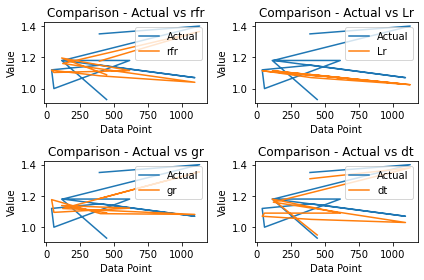

In [166]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

# Repeat the above code for other subplots (222, 223, 224)
plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()


In [167]:
from sklearn.metrics import mean_squared_error

# Calculating mean squared error (MSE) for each model
mse_lr = mean_squared_error(df2['Actual'], df2['Lr'])
mse_rfr = mean_squared_error(df2['Actual'], df2['rfr'])
mse_gr = mean_squared_error(df2['Actual'], df2['gr'])
mse_dt = mean_squared_error(df2['Actual'], df2['dt'])

# dictionary that stores the MSE values
mse_scores = {
    'Linear Regression': mse_lr,
    'Random Forest': mse_rfr,
    'Gradient Boosting': mse_gr,
    'Decision Tree': mse_dt
}

# To find the best model 
best_model = min(mse_scores, key=mse_scores.get)

print("The best model is:", best_model)

The best model is: Random Forest


In [168]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print()

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the testing set
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_mae = mean_absolute_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print("Best Model Evaluation:")
print("MSE:", best_mse)
print("MAE:", best_mae)
print("R-squared:", best_r2)

Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 200}

Best Model Evaluation:
MSE: 0.00826561849468956
MAE: 0.07166002879290674
R-squared: 0.7321175804261488


In [169]:
#Model_Prediction  
data_Predict = {'Total Volume':80595 ,
                'Total Bags':   1830,
                'XLarge Bags':0 ,
                'year' : 2015,
                'region' : 21 }
df_pred = pd.DataFrame(data_Predict,index=[0])
df_pred

,Total Volume,Total Bags,XLarge Bags,year,region
0,80595,1830,0,2015,21


In [170]:
# Predicting the result using the best model. 
new_pred = rfr.predict(df_pred )
print(new_pred)

[1.1144]


In [47]:
# Creating and treating the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Save the Random Forest model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

NameError: name 'X_train' is not defined